In [2]:
from astropy.io.fits import getdata
import pandas as pd
import numpy as np
import gTranRec as gtr
from astropy.nddata import Cutout2D
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.table import Table
import pickle
from random import randrange


In [3]:
df = pd.read_csv("../DataSets/train_set.csv")

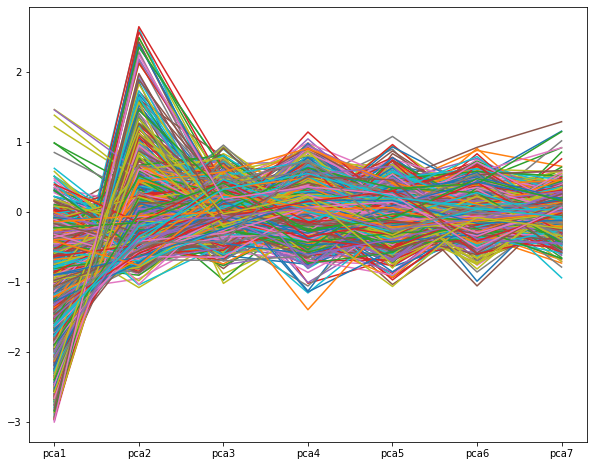

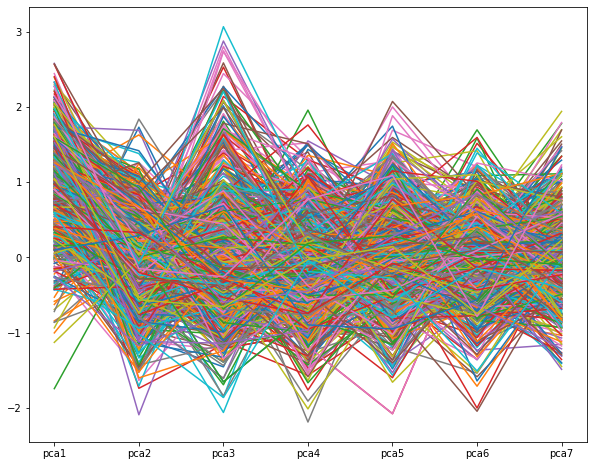

In [4]:
pca_col = ['pca{}'.format(i) for i in range(1,8)]
plt.figure(figsize=(10,8))
rand = [randrange(20000) for i in range(1000)]
for r in df[df.y==1].iloc[rand].iterrows():
    plt.plot(r[1][pca_col])
plt.show()
plt.figure(figsize=(10,8))
for b in df[df.y==0].iloc[rand].iterrows():
    plt.plot(b[1][pca_col])
plt.show()

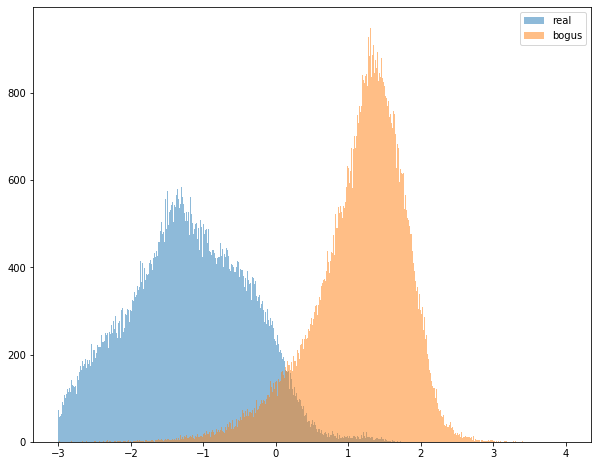

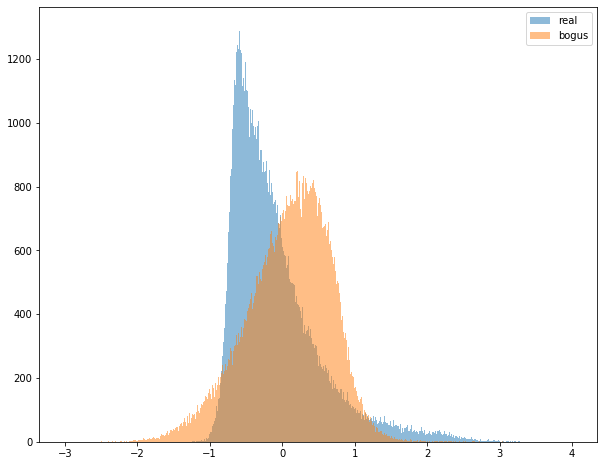

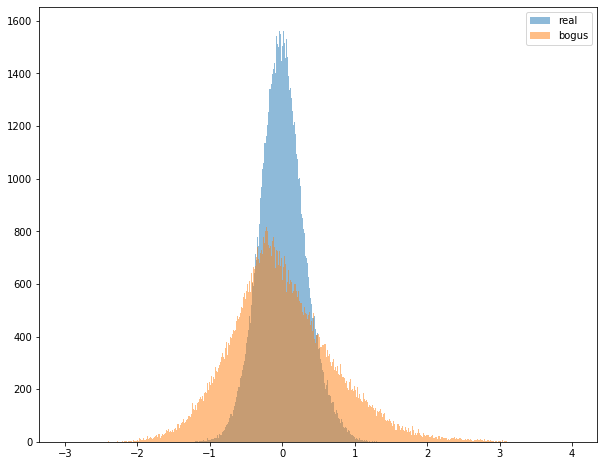

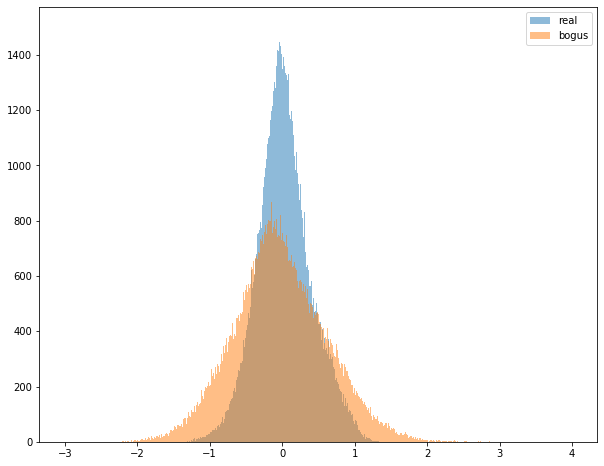

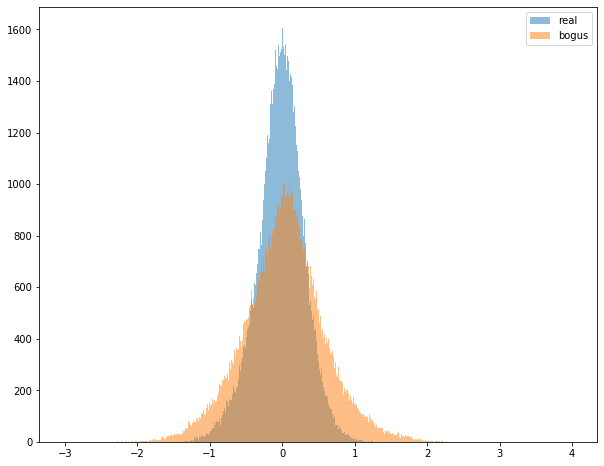

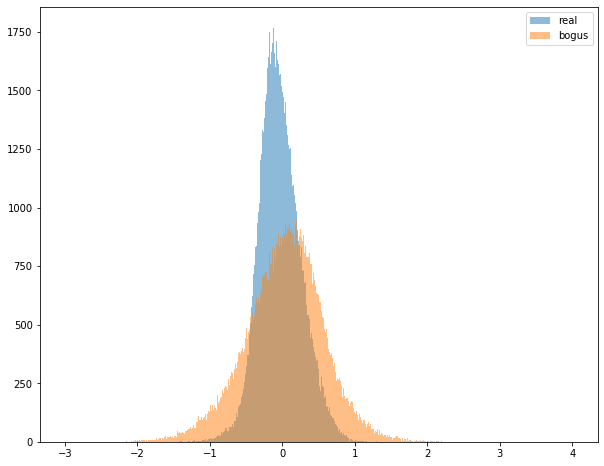

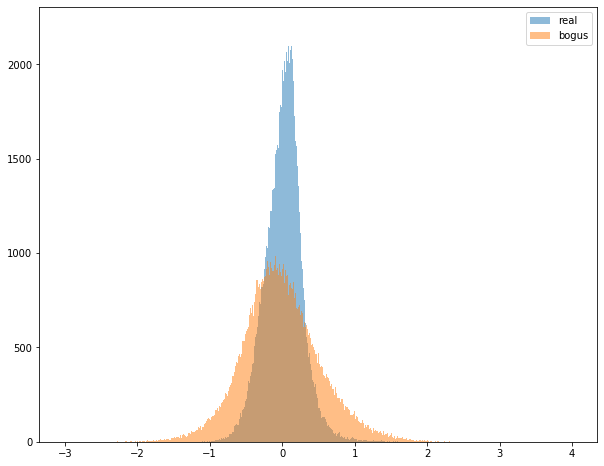

In [5]:
for i in range(1,8):
    feature = 'pca{}'.format(i)
    bins = np.linspace(-3,4,2000)
    plt.figure(figsize=(10,8))
    plt.hist(df[df.y==1][feature], bins=bins, alpha=0.5, label='real')
    plt.hist(df[df.y==0][feature], bins=bins, alpha=0.5, label='bogus')
    plt.legend()
    plt.show()

In [6]:
b = 0.5
print(np.sum(df[df.y==0].pca1<b)/np.sum(df.y==0))
print(np.sum(df[df.y==1].pca1>b)/np.sum(df.y==1))

0.14351996696159286
0.013247100245964066


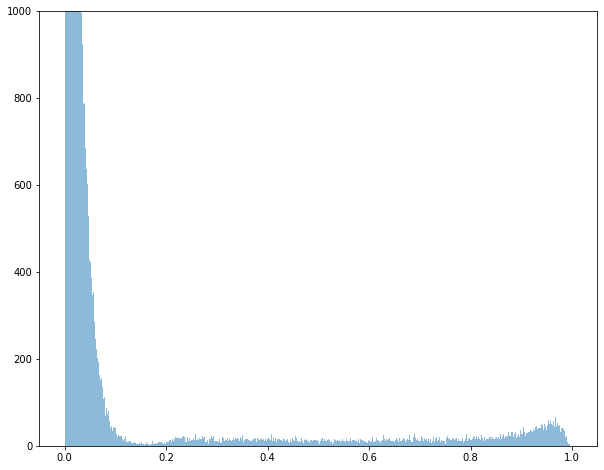

In [8]:
feature = 'gauss_R'
bins = np.linspace(0,1,2000)
plt.figure(figsize=(10,8))
plt.hist(df[df.y==1][feature], bins=bins, alpha=0.5)
# plt.hist(df[df.y==0][feature], bins=bins, alpha=0.5)
plt.ylim(0,1000)
plt.show()

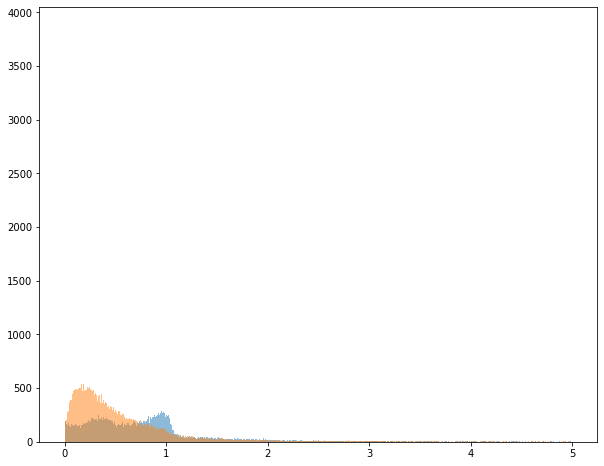

In [9]:
feature = 'gauss_amp'
bins = np.linspace(0,5,2000)
plt.figure(figsize=(10,8))
plt.hist(df[df.y==1][feature], bins=bins, alpha=0.5)
plt.hist(df[df.y==0][feature], bins=bins, alpha=0.5)
plt.show()

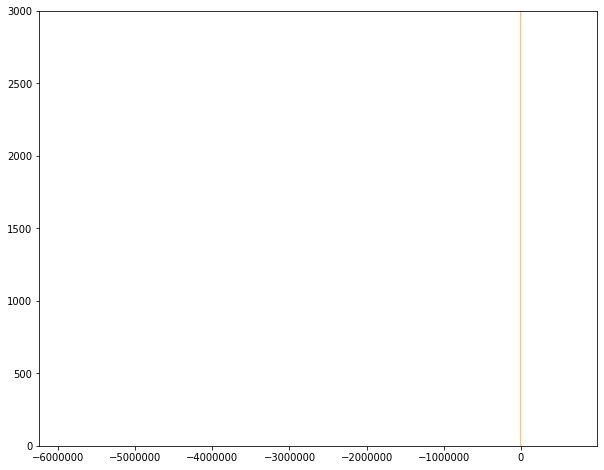

In [10]:
feature = 'gauss_theta'
bins = np.linspace(-10,10,2000)
plt.figure(figsize=(10,8))
plt.hist(df[df.y==1][feature], bins=1000, alpha=0.5)
plt.hist(df[df.y==0][feature], bins=1000, alpha=0.5)
plt.ylim(0, 3000)
plt.show()

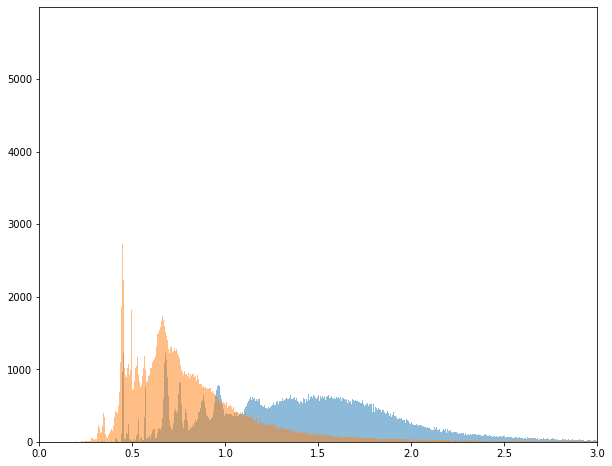

In [11]:
feature = 'b_image'
bins = np.linspace(0,5,2000)
plt.figure(figsize=(10,8))
plt.hist(df[df.y==1][feature], bins=bins, alpha=0.5)
plt.hist(df[df.y==0][feature], bins=bins, alpha=0.5)
plt.xlim(0,3)
plt.show()

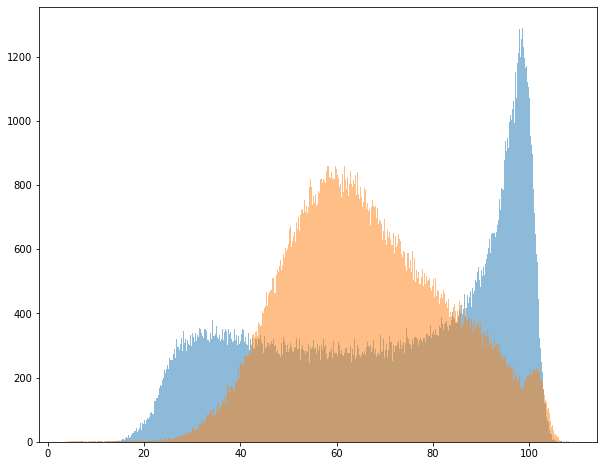

In [12]:
feature = 'abs_pv'
bins = np.linspace(0,5,2000)
plt.figure(figsize=(10,8))
plt.hist(df[df.y==1][feature], bins=1000, alpha=0.5)
plt.hist(df[df.y==0][feature], bins=1000, alpha=0.5)
plt.show()

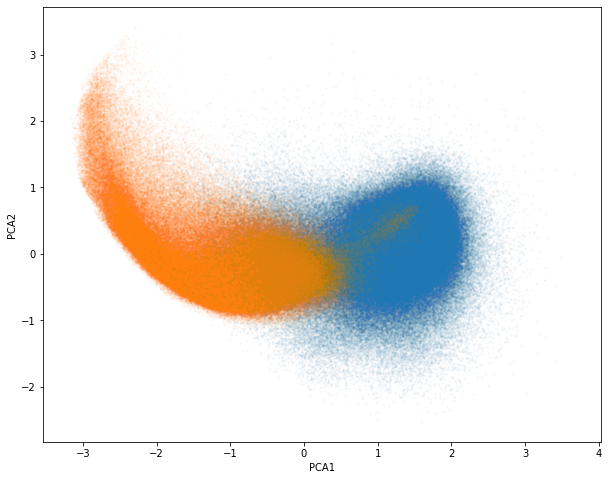

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(df[df.y==0].pca1, df[df.y==0].pca2, s=2, alpha=0.03)
plt.scatter(df[df.y==1].pca1, df[df.y==1].pca2, s=2, alpha=0.03)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

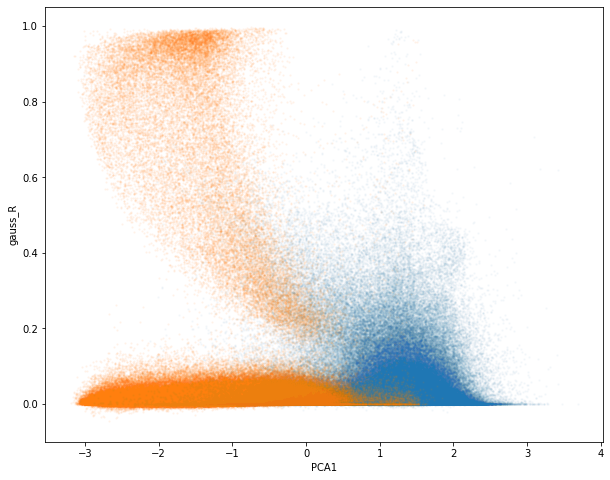

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(df[df.y==0].pca1, df[df.y==0].gauss_R, s=2, alpha=0.03)
plt.scatter(df[df.y==1].pca1, df[df.y==1].gauss_R, s=2, alpha=0.05)
plt.xlabel("PCA1")
plt.ylabel("gauss_R")
plt.show()